A continuación se realizará un experimento para obtener una ecuación que satisfaga un conjunto de datos generados inicialmente, para modificar la ecuación se hará uso del Descenso del gradiente estocástico

In [1]:
import random
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Obtencion de los 100 datos utilizados para el experimento

In [2]:
mainData = pd.read_csv('data.txt', sep='\s+', header=None)
mainData = mainData.to_numpy()
print(mainData.size)

300


In [3]:
M = 100

Se requiere una función que setee los pesos iniciales (Aleatorios) así como la que aplique la ecuación

In [4]:
W_F = []
W_I = []
def setWeights(): # Funcion que setea alateoriamente los pesos
    global W_I
    W_F.clear()
    for i in range(3): # Al ser solo 2 parametros y el bias solo serán 3
        W_F.append(round(random.uniform(-0.01, 0.01), 5))
    W_I = W_F.copy()

def h0(v): # Funcion de regresión logística
    fV = W_F[0] + W_F[1]*v[0] + W_F[2]*v[1] # Funcion del modelo Z = O0 + 01X1 + O2X2
    return (1 / (1 + np.exp(-fV))) # Regresa la funcion sigmoide g(z)

A continuación se presenta las 3 funciones principales, la primera se encarga de gráficar la raíz del error cuadrático medio (Funcion que utilizaremos para evaluar el desempeño de nuestra función) a traves de las epocas (Ciclos a relizar para actualizar pesos)

La siguiente función se encarga de pintar 3 diferentes datos, primero graficará los 100 datos generados, despues la función seno y por ultimo la función polinomial obtenida

La ultima función se encarga de hacer el descenso del gadiente estocástico; para ello por cada época y punto actulizará los parámetros de la función polinomeal deseada

In [5]:
def graficar():
    clase_0 = mainData[mainData[:, 2] == 0]
    clase_1 = mainData[mainData[:, 2] == 1]
    plt.figure(figsize=(10, 6))
    plt.scatter(clase_0[:, 0], clase_0[:, 1], color='red', label='Clase 0', edgecolors='k')
    plt.scatter(clase_1[:, 0], clase_1[:, 1], color='green', label='Clase 1', edgecolors='k')
    x1_min, x1_max = mainData[:, 0].min(), mainData[:, 0].max()
    x1_valores = np.linspace(x1_min, x1_max, 100)
    finalValues = -(W_F[1] * x1_valores + W_F[0]) / W_F[2]
    initialValues = -(W_I[1] * x1_valores + W_I[0]) / W_I[2]
    plt.plot(x1_valores, finalValues, color='black', linewidth=2, label='Modelo Final')
    plt.plot(x1_valores, initialValues, color='blue', linewidth=2, label='Modelo Inicial')
    plt.title('Regresión Logística')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xlim(mainData[:, 0].min(), mainData[:, 0].max())
    plt.ylim(mainData[:, 1].min()-0.5, mainData[:, 1].max()+0.5)
    plt.show()

def evaluar_modelo():
    tp = 0 # True positives
    tn = 0 # True negatives
    fp = 0 # False positives
    fn = 0 # False negatives
    for i in range(100):
        x = mainData[i][0:2]
        y_real = int(mainData[i][2])
        probabilidad = h0(x)
        y_pred = 1 if probabilidad >= 0.5 else 0 # Aqui redonde lo obtenido en la función logística
        if y_real == 1: # Aqui setea el resultado según que es (TP, TN, FP, FN)
            if y_pred == 1: tp += 1
            else: fn += 1
        else:
            if y_pred == 0: tn += 1
            else: fp += 1
    # Funciones para estimar calidad del modelo
    accuracy = (tp + tn) / M
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    print('RESULTADOS DE CLASIFICACIÓN')
    print(f"TN: {tn}")
    print(f"FP: {fp}")
    print(f"FN: {fn}")
    print(f"TP: {tp}")
    print(f"Accuracy:  {accuracy:.2%}")
    print(f"Precision: {precision:.2%}")
    print(f"Recall:    {recall:.2%}")

def StochasticGradientDescent(M, E):
    setWeights() # Inicializa aleatoriamente los pesos
    for e in range(E): # Se hara por cada época
        for i in range(M):
            x = mainData[i][0:2] # Obtiene los valores X1 y X2
            y_real = mainData[i][2] # Obtiene la etiqueta real
            currentError = y_real - h0(x) # Resta la función logística con los pesos actuales con la etiqueta real
            W_F[0] = W_F[0] + a * currentError * 1 # Actualiza peso bias
            W_F[1] = W_F[1] + a * currentError * x[0] # Actualiza peso X1
            W_F[2] = W_F[2] + a * currentError * x[1] # Actualiza peso X2
    print('Pesos Iniciales:', W_I)
    print('Pesos Finales:', W_F)
    evaluar_modelo()
    graficar()

Aqui se definen los parámetros que pueden ser modificados, estos siendo: 
A = Alfa (Tasa de aprendizaje)
D = Número de parámetros
E = Épocas a realizar

In [6]:
a = 0.002
E = 1000

Al correr el siguiente fragmento de código se realizara el descenso del gradiente estocástico con los parametros definidos, una vez realizada, dibujara las gráficas de la raíz del error cuadrático medio así como las gráficas de interpretación de datos

Pesos Iniciales: [-0.00125, 0.00193, 0.00129]
Pesos Finales: [np.float64(5.343371439411754), np.float64(-0.6897374712958787), np.float64(2.300608317741771)]
RESULTADOS DE CLASIFICACIÓN
TN: 50
FP: 0
FN: 0
TP: 50
Accuracy:  100.00%
Precision: 100.00%
Recall:    100.00%


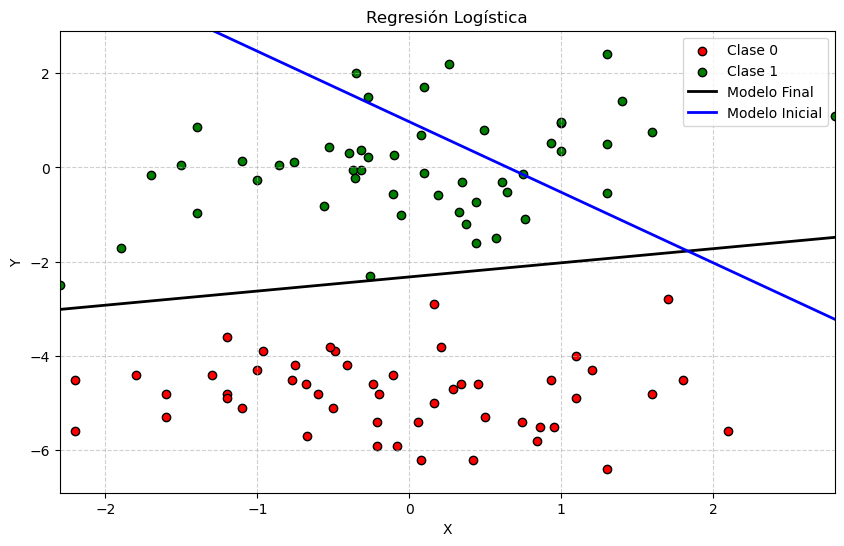

In [7]:
StochasticGradientDescent(M, E)